In [4]:
import xarray
from saveCore_standalone import run_powerBlobs

In [2]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [92]:
testfile = '/home/ck/DIR/mymachine/cores_fromMeteosat/cores/coresPower_MSG_-40_700km2_-50points_dominant_2009_08.nc'

In [93]:
data = xr.open_dataset(testfile)

In [94]:
data

<xarray.Dataset>
Dimensions:  (lat: 296, lon: 674, time: 1481)
Coordinates:
  * lat      (lat) float64 3.912 3.957 4.003 4.048 ... 16.87 16.91 16.95 17.0
  * lon      (lon) float64 -17.68 -17.64 -17.59 -17.55 ... 12.45 12.5 12.54
  * time     (time) datetime64[ns] 2009-08-01 ... 2009-08-31T23:30:00
Data variables:
    blobs    (time, lat, lon) int16 ...
    tir      (time, lat, lon) int16 ...
Attributes:
    radii:              [3 4 5]
    scales_rounded:     [25 35 50]
    scales_original:    [25.         35.35533906 50.        ]
    cutout_T:           -40
    cutout_minPixelNb:  28.0

In [95]:
tstep = data.isel(time=612)

In [96]:
tstep = tstep.sel(lon=slice(-18,10), lat=slice(5,18))

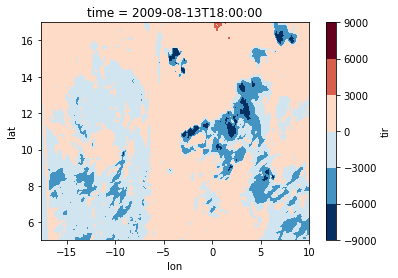

In [97]:
tstep['tir'].plot.contourf()

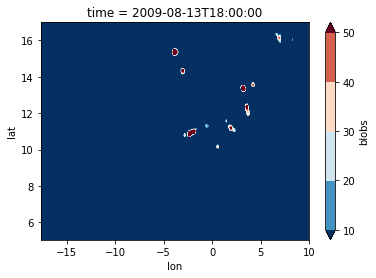

In [98]:
tstep['blobs'].plot.contourf(levels=np.linspace(10,50,5))

In [99]:
meteosat_data = tstep['tir'].values/100
latitudes = tstep.lat
longitudes = tstep.lon
date = tstep.time
savefile = '/home/ck/DIR/cornkle/data/test/testblob.nc'

In [100]:
run_powerBlobs.wavelet_analysis(meteosat_data, longitudes, latitudes, date, savefile, data_resolution=5)

outmin -81.79 31.0
Saved /home/ck/DIR/cornkle/data/test/testblob.nc


<xarray.Dataset>
Dimensions:  (lat: 271, lon: 617)
Coordinates:
  * lat      (lat) float64 5.039 5.084 5.129 5.174 ... 16.87 16.91 16.95 17.0
    time     datetime64[ns] 2009-08-13T18:00:00
  * lon      (lon) float64 -17.68 -17.64 -17.59 -17.55 ... 9.894 9.938 9.983
Data variables:
    blobs    (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    tir      (lat, lon) int16 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
Attributes:
    radii:              [2 3 5]
    scales_rounded:     [25 35 50]
    scales_original:    [25.         35.35533906 50.        ]
    cutout_T:           -40
    cutout_minPixelNb:  28.0